# Imports

In [6]:
import os, sys
import pandas as pd
sys.path.append('..')

from Class.PlotConfig import *

# Arguments

In [7]:
from dataclasses import dataclass

@dataclass
class args:
    outputPath = '../results/cleaned target/total_target_cleaned_scaled'
    figPath = os.path.join(outputPath, 'figures')
    train_loss_filePath = os.path.join(outputPath, 'run-version_0-tag-train_loss_epoch.csv')
    val_loss_filePath = os.path.join(outputPath, 'run-version_0-tag-val_loss.csv')

# Utils

In [8]:
def get_tick(scale):
    return FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale))

def plot_loss(
    df, figsize=(14,8), title:str=None, figure_name:str=None, 
    base=5, annotate=True, scale=1e-5
):
    df['Epoch'] = df['Step'] / df['Step'].min()
    df['Epoch'] = df['Epoch'].astype(int)

    fig, ax = plt.subplots(figsize=figsize)
    scale = 1e-5
    plt.gca().yaxis.set_major_formatter(get_tick(scale))

    ax.xaxis.set_major_locator(MultipleLocator(base=base))

    plt.plot(df['Epoch'], df['Value'])
    plt.xlabel('Number of epochs')
    if scale != 1:
        plt.ylabel(f'Mean squared loss (x {scale})')
    else:
        plt.ylabel('Mean squared loss')
    # plt.ylim(bottom=df['Value'].min())
    plt.xlim(df['Epoch'].min()-1, df['Epoch'].max()+1)
    if title is not None:
        plt.title(title)

    minimum_loss = df['Value'].min()
    epoch = df[df['Value']==minimum_loss]['Epoch'].values[0]

    if annotate:
        arrowprops = dict(arrowstyle="fancy, head_length=0.8, head_width=0.5, tail_width=0.2", color='red')

        plt.annotate(f'Minimum point ({epoch}, {minimum_loss:0.3g})', 
            xy=(epoch, minimum_loss),
            xytext=(max((6-epoch)*20, 0), 170), 
            textcoords='offset points',
            size=20, 
            ha='center', va="center",
            arrowprops=arrowprops
        )

    # fig.tight_layout() # might change y axis values
    if figure_name is not None:
        plt.savefig(figure_name, dpi=DPI)
    plt.show()

#  Plotting

## Train

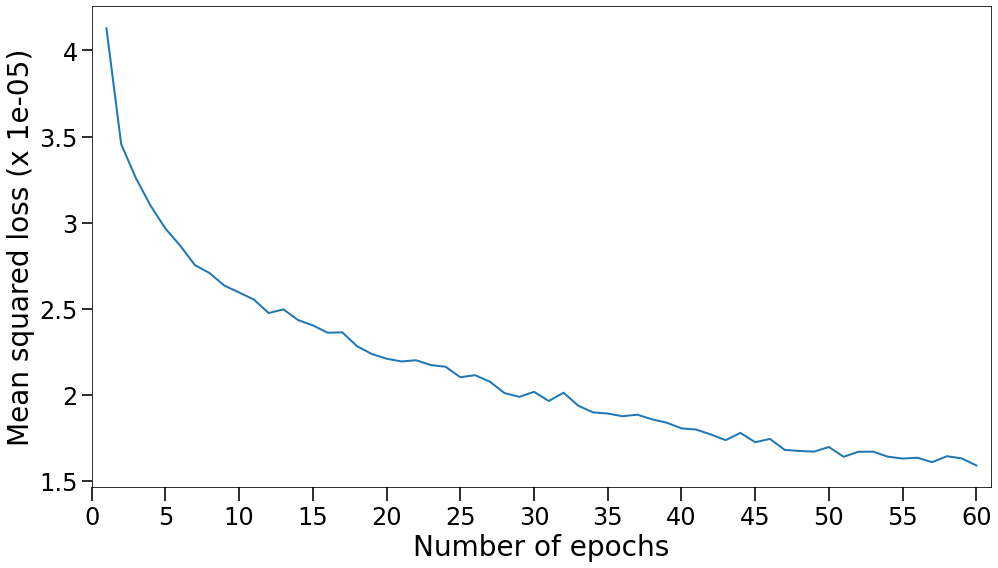

In [9]:
df = pd.read_csv(args.train_loss_filePath)
plot_loss(df, figure_name=os.path.join(args.outputPath, 'train_loss.jpg'), annotate=False)

## Validation

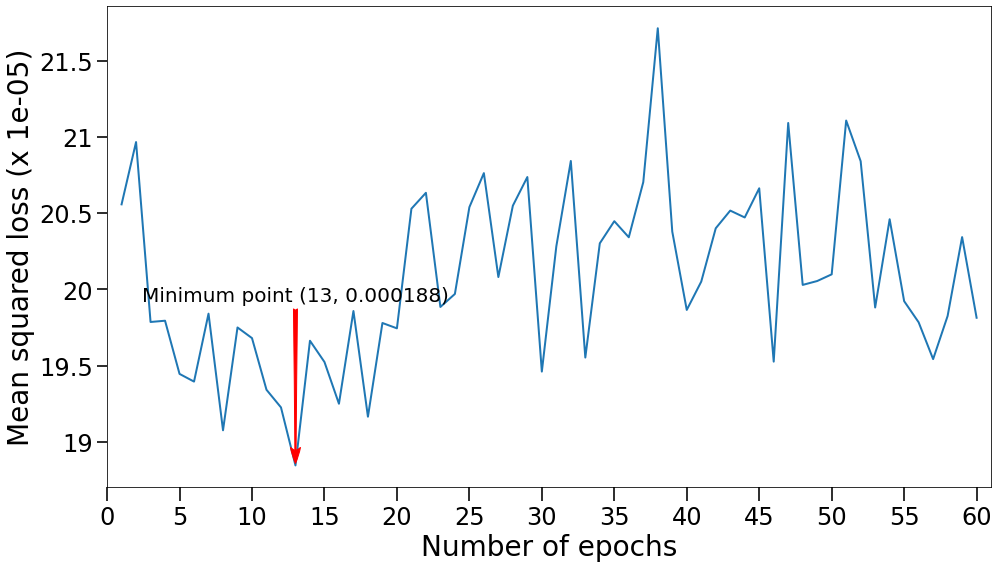

In [10]:
df = pd.read_csv(args.val_loss_filePath)
plot_loss(df, figure_name=os.path.join(args.outputPath, 'validation_loss.jpg'))